In [1229]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [594]:
#getting url and creating soup
url = 'https://www.blocket.se/annonser/hela_sverige/fordon/batar/segelbat?blf=6&cg=1062&q=segelb%C3%A5t'
html = requests.get(url).content
soup = BeautifulSoup(html)

In [595]:
#finding name for the ads on the first page
name=[i.text.strip() for i in soup.select("div > h2")]

In [596]:
#checking length of name, the number of fetched ads. should be the same for all data fetched from here on
len(name)

40

In [597]:
#finding price for the ads on the first page and removing what shouldnt be included

pris=[i.text.strip() for i in soup.select("div > span")]
del pris[0:7]
del pris[-6:]
while("Butik" in pris) : 
    pris.remove("Butik")
while("Företag" in pris) : 
    pris.remove("Företag")
    
pris

['495 000 kr',
 '9 000 kr',
 '299 000 kr',
 '135 000 kr',
 '115 000 kr',
 '110 000 kr',
 '49 000 kr',
 '225 000 kr',
 '105 000 kr',
 '220 000 kr',
 '160 000 kr',
 '25 000 kr',
 '129 000 kr',
 '220 000 kr',
 '99 000 kr',
 '120 000 kr',
 '200 000 kr',
 '65 000 kr',
 '140 000 kr',
 '175 000 kr',
 '60 000 kr',
 '150 000 kr',
 '70 000 kr',
 '140 000 kr',
 '445 000 kr',
 '93 000 kr',
 '590 000 kr',
 '485 000 kr',
 '80 000 kr',
 '88 000 kr',
 '79 000 kr',
 '150 000 kr',
 '185 000 kr',
 '195 000 kr',
 '750 000 kr',
 '285 000 kr',
 '70 000 kr',
 '210 000 kr',
 '1 099 000 kr',
 '160 000 kr']

In [598]:
#to make sure length is same of all data fetched
len(pris)

40

In [599]:
#finding the href to each ad to be able to fetch feet
links = ['https://www.blocket.se' + i['href'] for i in soup.select('h2 > a')]

In [600]:
links

['https://www.blocket.se/annons/goteborg/bavaria_31_cruiser__2008/91673434',
 'https://www.blocket.se/annons/goteborg/anso_31_i_bohuslan/91672522',
 'https://www.blocket.se/annons/halland/malo_40_h__1982__rullgen___bog_prop__teak/91328052',
 'https://www.blocket.se/annons/stockholm/mamba_31/91476248',
 'https://www.blocket.se/annons/skane/scampi_30___riktigt_fint_skick/91417984',
 'https://www.blocket.se/annons/vasterbotten/sagitta_30___ny_motor/91139359',
 'https://www.blocket.se/annons/uppsala/comfort_30_1974/91656385',
 'https://www.blocket.se/annons/skane/hallberg_rassy_monsun_31/91655850',
 'https://www.blocket.se/annons/uppsala/semona_30/91654917',
 'https://www.blocket.se/annons/skane/motorseglare_lm_30_i_klagshamn/90008741',
 'https://www.blocket.se/annons/gavleborg/motorseglare_nautilus_31__79/90597394',
 'https://www.blocket.se/annons/stockholm/linjett_30/90904894',
 'https://www.blocket.se/annons/stockholm/comfort_30/90648266',
 'https://www.blocket.se/annons/stockholm/omega

In [601]:
#getting feet for each ad
fot = []
for i in links:    
    html = requests.get(i).content
    
    soup = BeautifulSoup(html)
    
    fot1=[i.text.replace('Längd', '') for i in soup.select("div > div > div > div > div > div > div ")]
    
    while("" in fot1) : 
        fot1.remove("")
    fot.append(fot1)

In [766]:
fot

[['31 fot'],
 ['31 fot'],
 ['31 fot'],
 ['31 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['31 fot'],
 ['30 fot'],
 ['30 fot'],
 ['31 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['31 fot'],
 ['30 fot'],
 ['31 fot'],
 ['31 fot'],
 ['30 fot'],
 ['31 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['31 fot'],
 ['31 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['30 fot'],
 ['31 fot'],
 ['30 fot'],
 ['30 fot']]

In [769]:
#making sure only the numbers come with
fot=[j[:2] for i in fot for j in i]

In [770]:
#to amke sure length is same of all data fetched
len(fot)

40

In [654]:
#finding location for the ads on the first page
url = 'https://www.blocket.se/annonser/hela_sverige/fordon/batar/segelbat?blf=6&cg=1062&q=segelb%C3%A5t'
html = requests.get(url).content
soup = BeautifulSoup(html)
ort1=[i.text.strip() for i in soup.select("article >div > div :nth-child(2)")]

while "" in ort1:
    ort1.remove("")

            
ort = []
for i in ort1:
    if len(i) < 16:
        if 'AB' not in i:
            ort.append(i)

In [655]:
#making sure length is same for all data fetched
len(ort)

40

In [656]:
#looking through fetched locations
ort

['Göteborg',
 'Göteborg',
 'Halland',
 'Stockholm',
 'Skåne',
 'Västerbotten',
 'Uppsala',
 'Skåne',
 'Uppsala',
 'Skåne',
 'Gävleborg',
 'Stockholm',
 'Stockholm',
 'Stockholm',
 'Stockholm',
 'Kalmar',
 'Stockholm',
 'Stockholm',
 'Södermanland',
 'Skåne',
 'Skaraborg',
 'Halland',
 'Gävleborg',
 'Stockholm',
 'Göteborg',
 'Uppsala',
 'Göteborg',
 'Göteborg',
 'Skåne',
 'Halland',
 'Uppsala',
 'Stockholm',
 'Stockholm',
 'Skaraborg',
 'Stockholm',
 'Stockholm',
 'Kalmar',
 'Göteborg',
 'Stockholm',
 'Göteborg']

In [607]:
#getting time and day/date for all ads on first page
url = 'https://www.blocket.se/annonser/hela_sverige/fordon/batar/segelbat?blf=6&cg=1062&q=segelb%C3%A5t'
html = requests.get(url).content
soup = BeautifulSoup(html)
tid1=[i.text.strip() for i in soup.select("article >div > div > :nth-child(3)")]

tid1


['Idag 14:17',
 'Idag 13:22',
 'Idag 11:50',
 'Idag 11:33',
 'Idag 10:42',
 'Igår 22:26',
 'Igår 13:33',
 'Igår 13:00',
 'Igår 12:12',
 'Igår 10:24',
 'Igår 09:04',
 'I onsdags 21:34',
 'I onsdags 17:30',
 'I onsdags 15:03',
 'I onsdags 14:16',
 'I onsdags 13:17',
 'I onsdags 07:12',
 'I tisdags 20:56',
 'I tisdags 20:29',
 'I tisdags 18:39',
 'I tisdags 18:07',
 'I tisdags 17:22',
 'I tisdags 15:22',
 'I tisdags 14:36',
 'I tisdags 13:38',
 'I tisdags 12:53',
 'I tisdags 11:34',
 'I tisdags 07:15',
 'I tisdags 07:10',
 'I måndags 18:26',
 'I måndags 17:33',
 'I måndags 16:15',
 'I måndags 15:03',
 'I måndags 11:11',
 'I måndags 08:52',
 'I måndags 07:08',
 'I söndags 21:52',
 'I söndags 20:27',
 'I söndags 18:18',
 'I söndags 18:08']

In [608]:
#splitting to be able to egt one column for date and one for time
tid2 = [i.split(' ') for i in tid1]

In [609]:
tid2

[['Idag', '14:17'],
 ['Idag', '13:22'],
 ['Idag', '11:50'],
 ['Idag', '11:33'],
 ['Idag', '10:42'],
 ['Igår', '22:26'],
 ['Igår', '13:33'],
 ['Igår', '13:00'],
 ['Igår', '12:12'],
 ['Igår', '10:24'],
 ['Igår', '09:04'],
 ['I', 'onsdags', '21:34'],
 ['I', 'onsdags', '17:30'],
 ['I', 'onsdags', '15:03'],
 ['I', 'onsdags', '14:16'],
 ['I', 'onsdags', '13:17'],
 ['I', 'onsdags', '07:12'],
 ['I', 'tisdags', '20:56'],
 ['I', 'tisdags', '20:29'],
 ['I', 'tisdags', '18:39'],
 ['I', 'tisdags', '18:07'],
 ['I', 'tisdags', '17:22'],
 ['I', 'tisdags', '15:22'],
 ['I', 'tisdags', '14:36'],
 ['I', 'tisdags', '13:38'],
 ['I', 'tisdags', '12:53'],
 ['I', 'tisdags', '11:34'],
 ['I', 'tisdags', '07:15'],
 ['I', 'tisdags', '07:10'],
 ['I', 'måndags', '18:26'],
 ['I', 'måndags', '17:33'],
 ['I', 'måndags', '16:15'],
 ['I', 'måndags', '15:03'],
 ['I', 'måndags', '11:11'],
 ['I', 'måndags', '08:52'],
 ['I', 'måndags', '07:08'],
 ['I', 'söndags', '21:52'],
 ['I', 'söndags', '20:27'],
 ['I', 'söndags', '18:18

In [610]:
#adding all days to own list
tid3 = []
for i in tid2:
    for j in i:
        if j != 'I':
            tid3.append(j)

In [611]:
#cleaning up making sure we only get the day
dag = tid3[::2] 
dag

['Idag',
 'Idag',
 'Idag',
 'Idag',
 'Idag',
 'Igår',
 'Igår',
 'Igår',
 'Igår',
 'Igår',
 'Igår',
 'onsdags',
 'onsdags',
 'onsdags',
 'onsdags',
 'onsdags',
 'onsdags',
 'tisdags',
 'tisdags',
 'tisdags',
 'tisdags',
 'tisdags',
 'tisdags',
 'tisdags',
 'tisdags',
 'tisdags',
 'tisdags',
 'tisdags',
 'tisdags',
 'måndags',
 'måndags',
 'måndags',
 'måndags',
 'måndags',
 'måndags',
 'måndags',
 'söndags',
 'söndags',
 'söndags',
 'söndags']

In [612]:
#making list with all times
tid= []
for i in tid3:
    if i not in dag:
        tid.append(i)


In [613]:
len(tid)

40

In [614]:
tid

['14:17',
 '13:22',
 '11:50',
 '11:33',
 '10:42',
 '22:26',
 '13:33',
 '13:00',
 '12:12',
 '10:24',
 '09:04',
 '21:34',
 '17:30',
 '15:03',
 '14:16',
 '13:17',
 '07:12',
 '20:56',
 '20:29',
 '18:39',
 '18:07',
 '17:22',
 '15:22',
 '14:36',
 '13:38',
 '12:53',
 '11:34',
 '07:15',
 '07:10',
 '18:26',
 '17:33',
 '16:15',
 '15:03',
 '11:11',
 '08:52',
 '07:08',
 '21:52',
 '20:27',
 '18:18',
 '18:08']

In [615]:
#looking at lengths for page 2,3,4,5
for i in links1:
        print(len(i))

40
40
40
34


In [616]:
#making path to page 2,3,4,5 with new list
links1 = []
for i in range(2,6):
    url = f"https://www.blocket.se/annonser/hela_sverige/fordon/batar/segelbat?blf=6&cg=1062&page={i}&q=segelb%C3%A5t"
    html = requests.get(url).content
    soup = BeautifulSoup(html)
    links = ['https://www.blocket.se' + i['href'] for i in soup.select('h2 > a')]   
    links1.append(links)

In [617]:
#fetching feet for page 2-5
fot2_5= []
for i in links1:
    for j in i:
        html = requests.get(j).content
        soup = BeautifulSoup(html)
        fot3=[j.text for j in soup.select("div > div > div > div > div > div > div ")]
        fot2_5.append(fot3)

In [618]:
fot2_5

[['Längd', '30 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '30 fot', '', '', ''],
 ['Längd', '31 fot', '', '', ''],
 ['Längd', '30

In [ ]:
#making sure we only get the numbers
fot2_5= []
for i in links1:
    for j in i:
        html = requests.get(j).content
        soup = BeautifulSoup(html)
        fot3=[j.text.replace('Längd', '') for j in soup.select("div > div > div > div > div > div > div ")]
        while("" in fot3) : 
            fot3.remove("")
        fot2_5.append(fot3)

In [771]:
#making sure we only get the numbers
fot2_5 = [j[:2] for i in fot2_5 for j in i]
fot2_5

['30',
 '30',
 '31',
 '30',
 '31',
 '30',
 '31',
 '30',
 '31',
 '31',
 '30',
 '31',
 '30',
 '30',
 '30',
 '30',
 '31',
 '31',
 '31',
 '30',
 '31',
 '30',
 '31',
 '31',
 '31',
 '30',
 '30',
 '30',
 '31',
 '30',
 '30',
 '30',
 '31',
 '31',
 '30',
 '30',
 '30',
 '31',
 '30',
 '31',
 '30',
 '30',
 '30',
 '30',
 '31',
 '31',
 '31',
 '30',
 '30',
 '30',
 '30',
 '31',
 '31',
 '30',
 '31',
 '31',
 '31',
 '30',
 '30',
 '31',
 '30',
 '30',
 '31',
 '31',
 '31',
 '31',
 '30',
 '30',
 '31',
 '31',
 '31',
 '31',
 '31',
 '31',
 '30',
 '31',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '31',
 '31',
 '30',
 '31',
 '31',
 '30',
 '30',
 '30',
 '31',
 '31',
 '31',
 '31',
 '31',
 '31',
 '30',
 '31',
 '31',
 '30',
 '31',
 '30',
 '31',
 '31',
 '30',
 '30',
 '31',
 '31',
 '31',
 '31',
 '31',
 '30',
 '30',
 '31',
 '31',
 '30',
 '30',
 '30',
 '30',
 '30',
 '31',
 '31',
 '31',
 '30',
 '31',
 '30',
 '31',
 '31',
 '30',
 '31',
 '31',
 '30',
 '30',
 '30',
 '30',
 '31',
 '31',
 '30',
 '30',
 '30',
 '30',
 '30',

In [772]:
#adding feet from page 1 with feet from page 2-5
making sure length is same for all
fot_alla=fot + fot2_5
len(fot_alla)

195

In [622]:
#getting ad title for ads page2-5
namn2_5 = []

for i in range(2,6):
    
    url = f"https://www.blocket.se/annonser/hela_sverige/fordon/batar/segelbat?blf=6&cg=1062&page={i}&q=segelb%C3%A5t"
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, 'lxml')
    namn2_51=[i.text.strip() for i in soup.select("div > h2")]
    namn2_5.append(namn2_51)

    
namn2_5

[['Segelbåt',
  'Dufour Arpege 1967 30 FOT',
  'Player 311',
  'NC-kryssaren nr 3',
  'Mamba 31',
  'Åh 30',
  'Hanse 311 -2003',
  'Scampi 30 Segelbåt',
  'Beason 31',
  'Hallberg-Rassy 31 Mk II / 2006',
  'Comfort 30 Nyare motor Långfärdsutrustad',
  'Ansö 31 motorbåt till höstpris',
  'Maxi 909 FC',
  'Ballad 1087',
  'Javelin 30',
  'Joker S30 + Gummibåt & motor + Plotter',
  'Hallberg Rassy Monsun 31',
  'Mamba 31',
  'Dominant 95',
  'Havskryssare 1961, Olle Enderlein',
  'Laurinkryssare H7 S19',
  'Linjett 30 LR',
  'Beason 31 - 1981',
  'Feeling 850 special 1988',
  'Arietta 31 -70',
  'Mycket fin Scampi 30',
  'Contest 30',
  'Omega 30 A i fint skick',
  'Vagabond 31 1985',
  'Linjett 30 LR',
  'Nordisk familjebåt, NF',
  'C&c 30e - 80',
  'Beason 31',
  'Iw31',
  'Albin Ballad, nr 147, 1973',
  'Omega 30A -86 med ny 21hk motor',
  'Segelbåt i stål',
  'HR Monsun 31',
  'Albin Ballad - utbytt motor och nytt elsystem',
  'Välutrustad Albin Delta 31 -84'],
 ['ÅH, av typen Ballad

In [623]:
#adding ad titles page 1 with page2-5 and checking length
namn_alla = name + [item for sublist in namn2_5 for item in sublist]
len(namn_alla)

195

In [624]:
#getting price for ads pages 2-5
pris2_5 = []

for i in range(2,6):
    
    url = f"https://www.blocket.se/annonser/hela_sverige/fordon/batar/segelbat?blf=6&cg=1062&page={i}&q=segelb%C3%A5t"
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, 'lxml')
    pris2_51=[i.text.strip() for i in soup.select("div > span")]
    pris2_5.append(pris2_51)

    
pris2_5

[['Kategorier',
  '',
  '',
  '',
  '',
  'Visa alla',
  'Senaste',
  '37 000 kr',
  '63 000 kr',
  '110 000 kr',
  '60 000 kr',
  '140 000 kr',
  '71 000 kr',
  '490 000 kr',
  '80 000 kr',
  '129 000 kr',
  'Butik',
  '1 060 000 kr',
  '125 000 kr',
  '110 000 kr',
  '275 000 kr',
  '130 000 kr',
  '25 000 kr',
  '69 000 kr',
  '350 000 kr',
  '140 000 kr',
  '80 000 kr',
  'Butik',
  '465 000 kr',
  '250 000 kr',
  '80 000 kr',
  '195 000 kr',
  '165 000 kr',
  '90 000 kr',
  '150 000 kr',
  '135 000 kr',
  '160 000 kr',
  '220 000 kr',
  '95 000 kr',
  '55 000 kr',
  '105 000 kr',
  '100 000 kr',
  '60 000 kr',
  '80 000 kr',
  '200 000 kr',
  'Butik',
  '350 000 kr',
  '160 000 kr',
  '100 000 kr',
  '200 000 kr',
  '41 – 80',
  '195',
  '295 000 kr',
  '70 000 kr',
  '95 000 kr'],
 ['Kategorier',
  '',
  '',
  '',
  '',
  'Visa alla',
  'Senaste',
  '50 000 kr',
  '49 000 kr',
  '275 000 kr',
  '85 000 kr',
  '110 000 kr',
  '280 000 kr',
  'Butik',
  '775 000 kr',
  '275 000 kr'

In [625]:
#cleaning up 
for i in pris2_5:
    del i[0:7]
    del i[-5:]
    while("Butik" in i) : 
        i.remove("Butik")
    while("Företag" in i) : 
        i.remove("Företag") 

In [627]:
#adding price page1 with apges2-5 and checking length
pris_alla = pris + [item for sublist in pris2_5 for item in sublist]
del pris_alla[-1]
len(pris_alla)

195

In [677]:
#fetching location for pages 2-5
ort2_5 = []

for i in range(2,6):
    
    url = f"https://www.blocket.se/annonser/hela_sverige/fordon/batar/segelbat?blf=6&cg=1062&page={i}&q=segelb%C3%A5t"
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, 'lxml')
    ort2_51=[i.text.strip() for i in soup.select("article >div > div :nth-child(2)")]
    ort2_5.append(ort2_51)
    
                


    
ort2_5

[['Segelbåt\xa0·\xa0Västernorrland',
  'Västernorrland',
  '',
  'Segelbåt\xa0·\xa0Göteborg',
  'Göteborg',
  '',
  'Segelbåt\xa0·\xa0Älvsborg',
  'Älvsborg',
  'Segelbåt\xa0·\xa0Göteborg',
  'Göteborg',
  'Segelbåt\xa0·\xa0Älvsborg',
  'Älvsborg',
  'Segelbåt\xa0·\xa0Norrbotten',
  'Norrbotten',
  '',
  'Segelbåt\xa0·\xa0Stockholm',
  'Stockholm',
  '',
  'Segelbåt\xa0·\xa0Västernorrland',
  'Västernorrland',
  '',
  'Segelbåt\xa0·\xa0Göteborg',
  'Göteborg',
  '',
  'Segelbåt\xa0·\xa0Göteborg',
  'Göteborg',
  'XLNT Yachting AB',
  'Segelbåt\xa0·\xa0Göteborg',
  'Göteborg',
  'Segelbåt\xa0·\xa0Stockholm',
  'Stockholm',
  'Segelbåt\xa0·\xa0Göteborg',
  'Göteborg',
  'Segelbåt\xa0·\xa0Göteborg',
  'Göteborg',
  'Segelbåt\xa0·\xa0Göteborg',
  'Göteborg',
  'Segelbåt\xa0·\xa0Halland',
  'Halland',
  'Segelbåt\xa0·\xa0Älvsborg',
  'Älvsborg',
  'Segelbåt\xa0·\xa0Östergötland',
  'Östergötland',
  '',
  'Segelbåt\xa0·\xa0Älvsborg',
  'Älvsborg',
  '',
  'Segelbåt\xa0·\xa0Kalmar',
  'Kalma

In [678]:
#adding locations page1 iwth pages 2-5 and checking length
ort2_5 = [item for sublist in ort2_5 for item in sublist]
ort2_5

['Segelbåt\xa0·\xa0Västernorrland',
 'Västernorrland',
 '',
 'Segelbåt\xa0·\xa0Göteborg',
 'Göteborg',
 '',
 'Segelbåt\xa0·\xa0Älvsborg',
 'Älvsborg',
 'Segelbåt\xa0·\xa0Göteborg',
 'Göteborg',
 'Segelbåt\xa0·\xa0Älvsborg',
 'Älvsborg',
 'Segelbåt\xa0·\xa0Norrbotten',
 'Norrbotten',
 '',
 'Segelbåt\xa0·\xa0Stockholm',
 'Stockholm',
 '',
 'Segelbåt\xa0·\xa0Västernorrland',
 'Västernorrland',
 '',
 'Segelbåt\xa0·\xa0Göteborg',
 'Göteborg',
 '',
 'Segelbåt\xa0·\xa0Göteborg',
 'Göteborg',
 'XLNT Yachting AB',
 'Segelbåt\xa0·\xa0Göteborg',
 'Göteborg',
 'Segelbåt\xa0·\xa0Stockholm',
 'Stockholm',
 'Segelbåt\xa0·\xa0Göteborg',
 'Göteborg',
 'Segelbåt\xa0·\xa0Göteborg',
 'Göteborg',
 'Segelbåt\xa0·\xa0Göteborg',
 'Göteborg',
 'Segelbåt\xa0·\xa0Halland',
 'Halland',
 'Segelbåt\xa0·\xa0Älvsborg',
 'Älvsborg',
 'Segelbåt\xa0·\xa0Östergötland',
 'Östergötland',
 '',
 'Segelbåt\xa0·\xa0Älvsborg',
 'Älvsborg',
 '',
 'Segelbåt\xa0·\xa0Kalmar',
 'Kalmar',
 '',
 'Båtagent Sverige',
 'Segelbåt\xa0·\xa0

In [679]:
#celaning up
while "" in ort2_5:
    ort2_5.remove("")
while "YachtBroker" in ort2_5:
    ort2_5.remove("YachtBroker")   
while "Albinhallen" in ort2_5:
    ort2_5.remove("Albinhallen")     
    
ort_25 = []
for i in ort2_5:
    if len(i) < 16:
        if 'AB' not in i:
            ort_25.append(i)
            
len(ort_25)       

155

In [681]:
#adding locations page1 with pages 2-5 and checking length
ort_alla = ort + ort_25
len(ort_alla)

195

In [632]:
#getting time and date for apges 2-5
tid_plats2_5 = []

for i in range(2,6):
    
    url = f"https://www.blocket.se/annonser/hela_sverige/fordon/batar/segelbat?blf=6&cg=1062&page={i}&q=segelb%C3%A5t"
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, 'lxml')
    tid_plats2_51=[i.text.strip() for i in soup.select("article >div > div > :nth-child(3)")]
    tid_plats2_5.append(tid_plats2_51)

    
tid_plats2_5

[['I söndags 14:46',
  'I söndags 12:40',
  'I söndags 12:11',
  'I söndags 10:19',
  'I söndags 08:31',
  'I söndags 07:07',
  'I söndags 06:58',
  'I lördags 21:00',
  'I lördags 15:41',
  'I lördags 13:40',
  'I lördags 12:31',
  'I lördags 11:04',
  'I lördags 07:12',
  '21 aug. 21:51',
  '21 aug. 14:03',
  '21 aug. 09:05',
  '20 aug. 18:45',
  '20 aug. 15:14',
  '20 aug. 13:14',
  '20 aug. 12:30',
  '20 aug. 09:42',
  '19 aug. 20:27',
  '19 aug. 10:33',
  '19 aug. 08:30',
  '18 aug. 19:31',
  '18 aug. 18:45',
  '18 aug. 18:31',
  '18 aug. 14:38',
  '18 aug. 07:45',
  '18 aug. 07:32',
  '17 aug. 20:37',
  '17 aug. 20:35',
  '17 aug. 20:05',
  '17 aug. 17:34',
  '17 aug. 15:55',
  '17 aug. 13:00',
  '17 aug. 11:12',
  '17 aug. 10:44',
  '17 aug. 07:08',
  '16 aug. 19:49'],
 ['16 aug. 13:15',
  '16 aug. 11:42',
  '15 aug. 18:02',
  '15 aug. 10:43',
  '14 aug. 10:53',
  '13 aug. 15:36',
  '13 aug. 13:22',
  '12 aug. 15:35',
  '12 aug. 14:42',
  '11 aug. 13:49',
  '11 aug. 10:19',
  '1

In [633]:
#making sure there are no lists in list
tid_plats2_5 = [item for sublist in tid_plats2_5 for item in sublist]

In [634]:
tid_plats2_5

['I söndags 14:46',
 'I söndags 12:40',
 'I söndags 12:11',
 'I söndags 10:19',
 'I söndags 08:31',
 'I söndags 07:07',
 'I söndags 06:58',
 'I lördags 21:00',
 'I lördags 15:41',
 'I lördags 13:40',
 'I lördags 12:31',
 'I lördags 11:04',
 'I lördags 07:12',
 '21 aug. 21:51',
 '21 aug. 14:03',
 '21 aug. 09:05',
 '20 aug. 18:45',
 '20 aug. 15:14',
 '20 aug. 13:14',
 '20 aug. 12:30',
 '20 aug. 09:42',
 '19 aug. 20:27',
 '19 aug. 10:33',
 '19 aug. 08:30',
 '18 aug. 19:31',
 '18 aug. 18:45',
 '18 aug. 18:31',
 '18 aug. 14:38',
 '18 aug. 07:45',
 '18 aug. 07:32',
 '17 aug. 20:37',
 '17 aug. 20:35',
 '17 aug. 20:05',
 '17 aug. 17:34',
 '17 aug. 15:55',
 '17 aug. 13:00',
 '17 aug. 11:12',
 '17 aug. 10:44',
 '17 aug. 07:08',
 '16 aug. 19:49',
 '16 aug. 13:15',
 '16 aug. 11:42',
 '15 aug. 18:02',
 '15 aug. 10:43',
 '14 aug. 10:53',
 '13 aug. 15:36',
 '13 aug. 13:22',
 '12 aug. 15:35',
 '12 aug. 14:42',
 '11 aug. 13:49',
 '11 aug. 10:19',
 '11 aug. 07:23',
 '11 aug. 07:20',
 '10 aug. 19:44',
 '

In [635]:
#cleaning up and getting only date, only time
dag2_5 = [i[:-5].strip() for i in tid_plats2_5]
tid2_5 = [i[-5:] for i in tid_plats2_5]

In [671]:
#adding date page1 with pages 2-5 and checking length
dag_alla = dag + dag2_5
len(dag_alla)

195

In [672]:
#adding time page 1 with pages2-5 and checking length
tid_alla = tid + tid2_5
len(tid_alla)

195

In [ ]:
#checking all lengths

In [682]:
len(ort_alla)

195

In [674]:
len(namn_alla)

195

In [675]:
len(pris_alla)

195

In [676]:
len(fot_alla)

195

In [1094]:
#creating df with scraped values

df = pd.DataFrame()

df['Namn'] = namn_alla
df['Pris'] = pris_alla
df['Ort'] = ort_alla
df['Fot'] = fot_alla
df['Datum'] = dag_alla
df['Tid'] = tid_alla


In [1982]:
#saving df to csv
df.to_csv('segelbåt.csv')

In [1095]:
#setting display options so that i can see all of my rows
pd.options.display.max_rows=200

In [1097]:
#removing the "kr" from the rows in the Pris-column
df.Pris = df.Pris.str.replace(' kr', '')

In [1098]:
#removing blank spaces and for the one row without price adding a zero
df.Pris = df.Pris.str.replace(' ','').replace("", "0")

In [ ]:
#dropping row that has no "Ort"
df.drop([96], inplace=True)

In [1100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Namn    195 non-null    object
 1   Pris    195 non-null    object
 2   Ort     195 non-null    object
 3   Fot     195 non-null    object
 4   Datum   195 non-null    object
 5   Tid     195 non-null    object
dtypes: object(6)
memory usage: 9.3+ KB


In [1101]:
df.Datum.unique()

array(['Idag', 'Igår', 'onsdags', 'tisdags', 'måndags', 'söndags',
       'I söndags', 'I lördags', '21 aug.', '20 aug.', '19 aug.',
       '18 aug.', '17 aug.', '16 aug.', '15 aug.', '14 aug.', '13 aug.',
       '12 aug.', '11 aug.', '10 aug.', '9 aug.', '8 aug.', '7 aug.',
       '6 aug.', '5 aug.', '4 aug.', '2 aug.', '1 aug.', '31 juli',
       '30 juli', '29 juli', '28 juli', '27 juli', '26 juli', '24 juli',
       '23 juli', '22 juli', '21 juli', '20 juli', '19 juli', '18 juli',
       '17 juli', '16 juli', '15 juli', '13 juli', '12 juli', '11 juli',
       '10 juli', '9 juli', '8 juli', '7 juli', '5 juli', '4 juli',
       '3 juli', '2 juli', '1 juli', '30 juni', '28 juni', '27 juni'],
      dtype=object)

In [1102]:
#changing type of Pris to integer
df.Pris = df.Pris.astype('int')

In [1103]:
#changing type of Fot to integer
df.Fot = df.Fot.astype('int')

In [1104]:
df.Ort.value_counts()

Göteborg          49
Stockholm         49
Skåne             15
Uppsala           10
Älvsborg           9
Halland            8
Kalmar             6
Skaraborg          6
Västernorrland     5
Östergötland       5
Gävleborg          4
Västmanland        4
Blekinge           4
Värmland           4
Södermanland       4
Örebro             3
Västerbotten       3
Norrbotten         2
Kronoberg          2
Segelbåt           1
Jönköping          1
Gotland            1
Name: Ort, dtype: int64

In [1106]:
# Changing some of the values of the Datum column to be able to change them all with a dict below

df.Datum=df.Datum.str.replace('Idag','28-08-2020').str.replace('Igår','27-08-2020').str.replace('I', '').str.replace('onsdags', '26-08-2020').str.replace('tisdags','25-08-2020').str.replace('måndags', '24-08-2020').str.replace('söndags','23-08-2020').str.replace('lördags','22-08-2020').str.strip()



In [1107]:
#Changing name of months so all values in Datum can get same appearance


to_sub = {
' aug.': '-08-2020',
' juli': '-07-2020',
' juni': '-06-2020'
}

df.Datum = df.Datum.replace(to_sub, regex=True)


In [1109]:
#changing values in datum to get same appearance
date = []
for i in list(df.Datum):
    if len(i) == 9:
        i ='0'+i
        date.append(i)
    else:
        date.append(i)

In [1110]:
#setting Datum to date 
df.Datum = date

In [1111]:
df

,Namn,Pris,Ort,Fot,Datum,Tid
0,"Bavaria 31 cruiser, 2008",495000,Göteborg,31,28-08-2020,14:17
1,ANSÖ 31 i Bohuslän,9000,Göteborg,31,28-08-2020,13:22
2,"Malö 40 H, 1982, Rullgen., Bog prop, teak",299000,Halland,31,28-08-2020,11:50
3,Mamba 31,135000,Stockholm,31,28-08-2020,11:33
4,Scampi 30 - riktigt fint skick,115000,Skåne,30,28-08-2020,10:42
5,Sagitta 30 - Ny motor,110000,Västerbotten,30,27-08-2020,22:26
6,Comfort 30 1974,49000,Uppsala,30,27-08-2020,13:33
7,Hallberg Rassy Monsun 31,225000,Skåne,31,27-08-2020,13:00
8,Semona 30,105000,Uppsala,30,27-08-2020,12:12
9,Motorseglare LM 30 i Klagshamn,220000,Skåne,30,27-08-2020,10:24


In [1984]:
#are there any correlations? hardly.
df.corr()

,Pris,Fot,Namnlängd
Pris,1.00,0.18,0.18
Fot,0.18,1.00,-0.13
Namnlängd,0.18,-0.13,1.00


In [1121]:
df.describe()

,Pris,Fot
count,1.950000e+02,195.000000
mean,1.972872e+05,30.456410
std,2.486107e+05,0.499378
min,0.000000e+00,30.000000
25%,7.500000e+04,30.000000
50%,1.250000e+05,30.000000
75%,2.050000e+05,31.000000
max,1.570000e+06,31.000000


In [1142]:
#wanting pris-values to be printed out
pd.options.display.float_format = '{:.2f}'.format

In [1438]:
#average price for 30 vs 31 feet in certain region
#renaming Pris-column to be able to merge later on
avg_pris_ort=df.groupby(['Ort', 'Fot'])[['Pris']].mean()
avg_pris_ort.rename(columns = {'Pris':'Snittpris'}, inplace=True)


In [1203]:
#number of boats 31 vs 30 feet in certain region
#renaming Fot-column to be able to merge later on
n_båt_salu = df.groupby(['Ort', 'Fot'])[['Fot']].count()
n_båt_salu.rename(columns = {'Fot':'Antal_Båtar'}, inplace=True)

In [1500]:
#merging the two
fot_snittpris = avg_pris_ort.merge(n_båt_salu, how="inner", on=["Ort", 'Fot'])

In [1501]:
fot_snittpris

Snittpris  Antal_Båtar
Ort            Fot                        
Blekinge       30   220000.00            3
               31   105000.00            1
Gotland        30     8000.00            1
Gävleborg      30    62500.00            2
               31   190000.00            2
Göteborg       30   149217.39           23
               31   238573.08           26
Halland        30    92400.00            5
               31   433000.00            3
Jönköping      31   110000.00            1
Kalmar         30   187500.00            6
Kronoberg      30   145000.00            2
Norrbotten     30   103000.00            2
Skaraborg      30   109400.00            5
               31   249000.00            1
Skåne          30   142857.14            7
               31   330000.00            8
Stockholm      30   223128.57           28
               31   229190.48           21
Södermanland   30    45000.00            2
               31   102000.00            2
Uppsala        30    81142.86            7
               31   177666.67            3
Värmland       30    70000.00            1
               31    73000.00            3
Västerbotten   30    69000.00            2
               31   275000.00            1
Västernorrland 30    54250.00            4
               31   120000.00            1
Västmanland    30   122500.00            2
               31   864500.00            2
Älvsborg       30   139000.00            1
               31   179375.00            8
Örebro         30    85000.00            1
               31   142500.00            2
Östergötland   30   298750.00            2
               31    98000.00            3

In [1522]:
#how many boats are for sale where

båt_per_ort = df.groupby(['Ort'])[['Ort']].count()

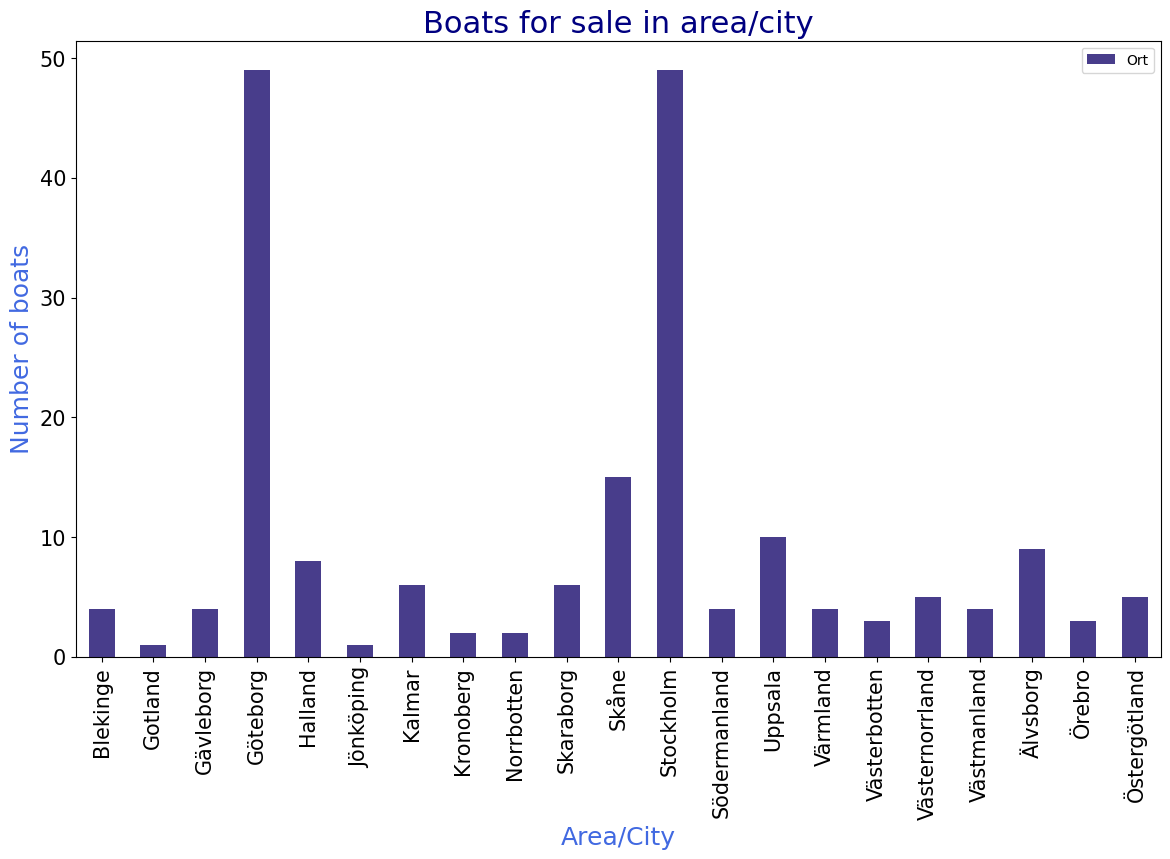

In [1926]:
#plotting boats for sale in different areas as bar chart

båt_salu_ort=båt_per_ort.plot(kind="bar", figsize=(14,8), fontsize=15, color='darkslateblue')
plt.title('Boats for sale in area/city', fontsize=22, c='navy')
plt.xlabel('Area/City', fontsize=18, c='royalblue')
plt.ylabel('Number of boats', fontsize=18, c='royalblue')
plt.savefig('båt_salu_ort.png')

In [1508]:
#making Fot a column ot be able to use values later on
fot_snittpris['Fot'] = fot_snittpris.index.get_level_values('Fot') 

In [1511]:
fot_snittpris

,Snittpris,Antal_Båtar,Fot
Ort,,,
Blekinge,220000.00,3,30
Blekinge,105000.00,1,31
Gotland,8000.00,1,30
Gävleborg,62500.00,2,30
Gävleborg,190000.00,2,31
Göteborg,149217.39,23,30
Göteborg,238573.08,26,31
Halland,92400.00,5,30
Halland,433000.00,3,31


In [1509]:
#dropping fot as index
fot_snittpris = fot_snittpris.droplevel(level=1)

In [1990]:
#selecting all boats that are 30 ft
fot_30=df.loc[df.Fot==30]

In [1969]:
#selecting all boats that are 31 ft
fot_31=df.loc[df.Fot==31]

In [1970]:
#average price 31ft 
ort_fot_31=fot_31.groupby(['Ort'])[['Pris']].mean()

In [1991]:
#average price 30ft
ort_fot_30=fot_30.groupby(['Ort'])[['Pris']].mean()

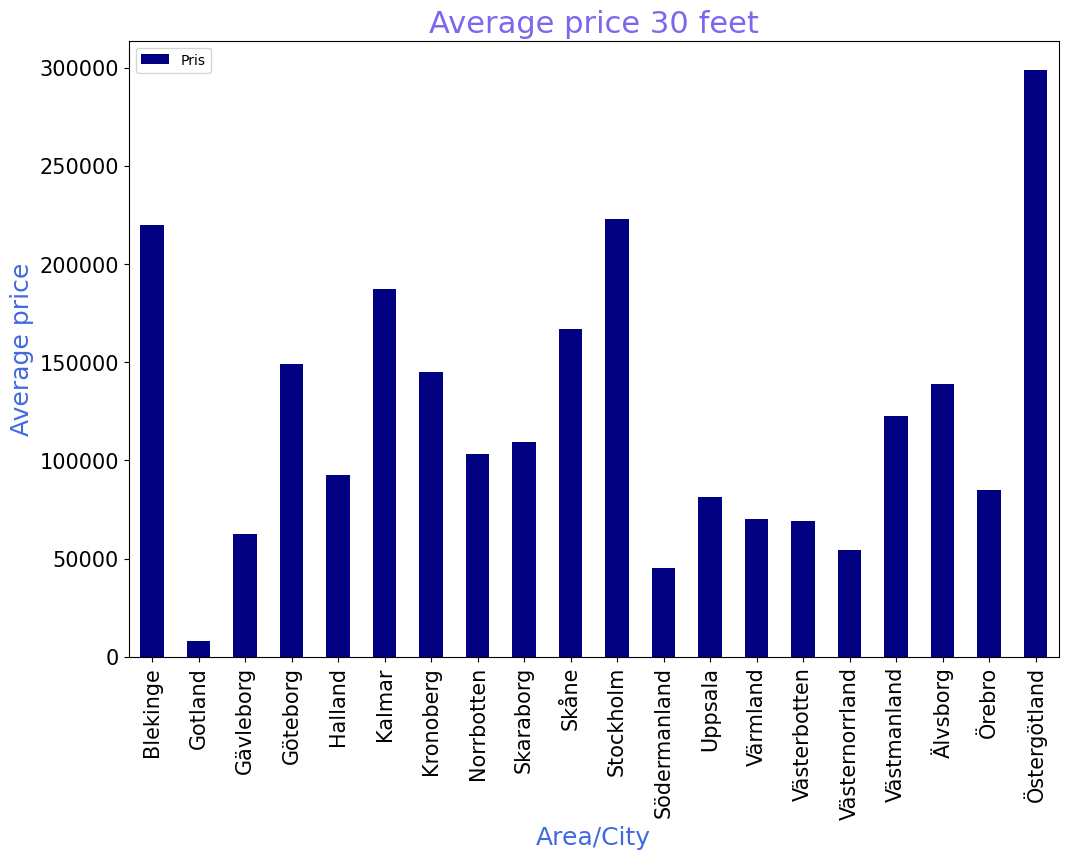

In [1992]:
#bar chart of average prices in different locations for 30ft boats

avg_pris_30=ort_fot_30.plot(kind="bar", figsize=(12,8), fontsize=15, color='navy')
plt.title('Average price 30 feet', fontsize=22, c='mediumslateblue')
plt.xlabel('Area/City', fontsize=18, c='royalblue')
plt.ylabel('Average price', fontsize=18, c='royalblue')
plt.savefig('avg_pris_30.png')

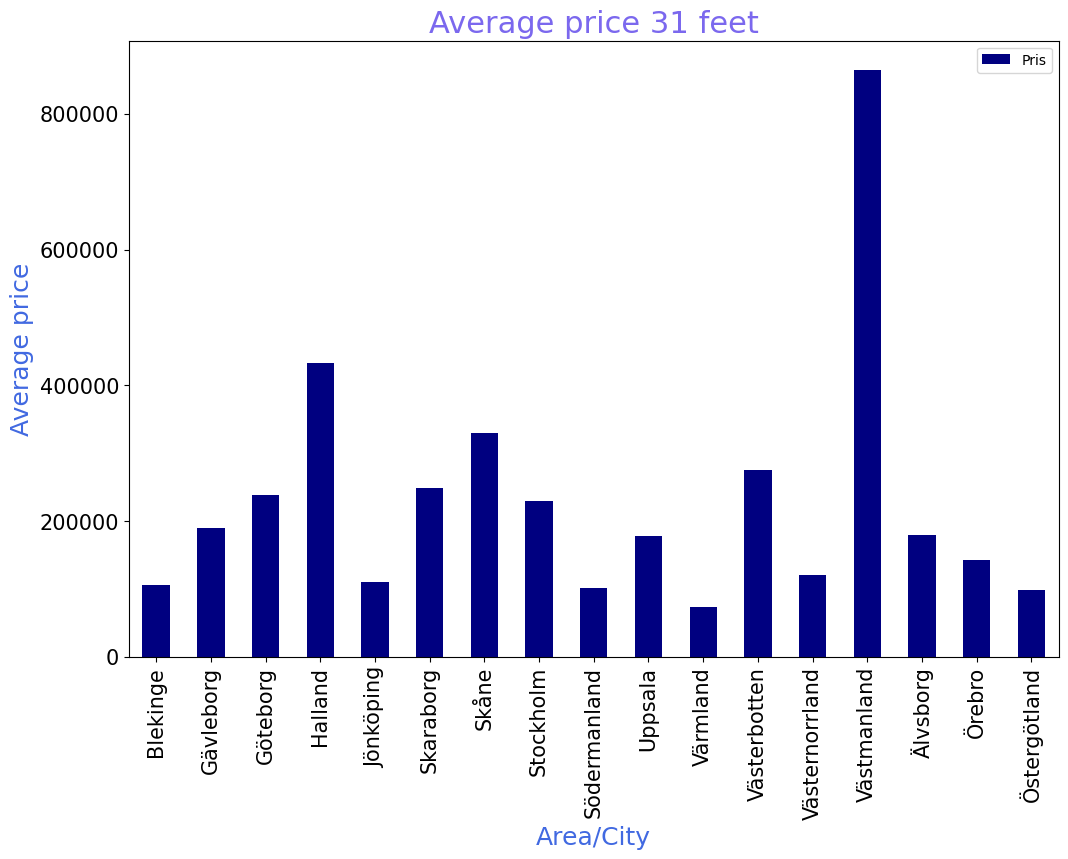

In [1973]:
#bar chart of average prices in different locations for 31ft boats


avg_pris_31=ort_fot_31.plot(kind="bar", figsize=(12,8), fontsize=15, color='navy')
plt.title('Average price 31 feet', fontsize=22, c='mediumslateblue')
plt.xlabel('Area/City', fontsize=18, c='royalblue')
plt.ylabel('Average price', fontsize=18, c='royalblue')
plt.savefig('avg_pris_31.png')

In [1596]:
#average price all boats
df.Pris.mean()

191469.07216494845

In [1974]:
#average price 31ft and 30ft
df.groupby(['Fot'])[['Pris']].mean()

,Pris
Fot,
30,154781.90
31,237419.32


In [ ]:
#counting how many boats are in different regions
#setting type to float to be able to make map below 
båt_per_ort=df.groupby(['Ort'])[['Ort']].count()
båt_per_ort.Ort=båt_per_ort.Ort.astype('float')

In [1985]:

import folium

 
# Putting in coordinates for the different locations
data = pd.DataFrame({
   'lon':[56.2, 57.6, 61.3, 57.7, 57, 57.8, 56.7, 56.9, 65.6, 60.1, 55.6, 
          59.3, 59.1, 59.9, 59.4, 63.8, 62.9, 59.6, 57.7, 59.3, 58.6],
   'lat':[15.6, 18.3, 16.4, 11.9, 13, 14.2, 16.3, 14.8, 22.2, 15.2, 13, 18, 
          16.6, 17.6, 13.5, 20.3, 17.8, 16.5, 11.9, 15.2, 16.2],
   'name':['Blekinge', 'Gotland','Gävleborg','Göteborg', 'Halland', 'Jönköping','Kalmar', 
           'Kronoberg','Norrbotten', 'Skaraborg', 'Skåne', 'Stockholm', 
           'Södermanland', 'Uppsala', 'Värmland', 'Västerbotten',
           'Västernorrland', 'Västmanland', 'Älvsborg','Örebro','Östergötland'],
   'value':båt_per_ort.Ort
})
data
 
# creating empty list
m = folium.Map(location=[63,16], tiles="OpenStreetMap", zoom_start=4)

# placing locations on map as circles, size dependant on amouont of boats available at location 

for i in range(0,len(data)):

    folium.Circle([data.iloc[i]['lon'], data.iloc[i]['lat']], 
                  popup=data.iloc[i]['name'], radius=data.iloc[i]['value']*1000, 
                  color='crimson', fill=True, fill_color='crimson').add_to(m)   

 # Saving map
m.save('mymap.html')

m


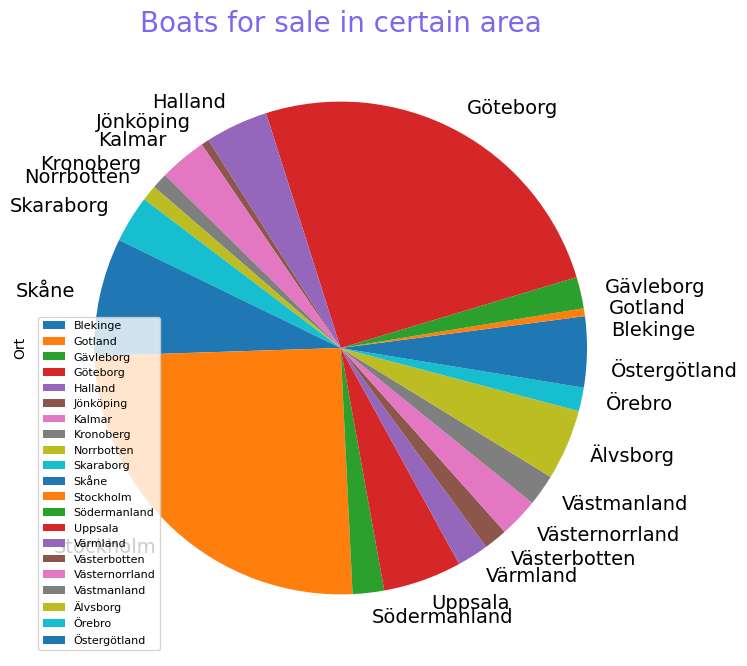

In [1715]:
#pie chart of boats for sale in certain location
båt_salu_ort_pie=båt_per_ort.plot(kind='pie', subplots=True, figsize=(12,8), fontsize=14, rot=30)
plt.legend(loc='lower left', fontsize=8)
plt.title('Boats for sale in certain area', fontsize=20, c='mediumslateblue')
plt.savefig('båt_salu_ort_pie.png')

In [1576]:
# getting the hour of posting for each ad
heltimme = []
for i in df.Tid:
    heltimme.append(i[:2])
heltimme=pd.Series(heltimme)

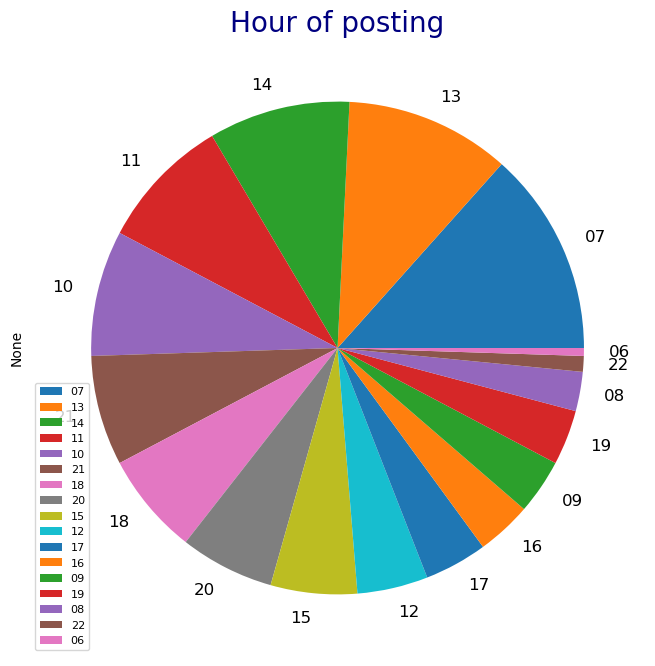

In [1977]:
#pie chart of the hour that the ads were posted
posting_hour=heltimme.value_counts().plot(kind='pie', figsize=(12,8), fontsize=12)
plt.legend(loc='lower left', fontsize=8)
plt.title('Hour of posting', fontsize=20, c='navy')
plt.savefig('posting_hour.png')

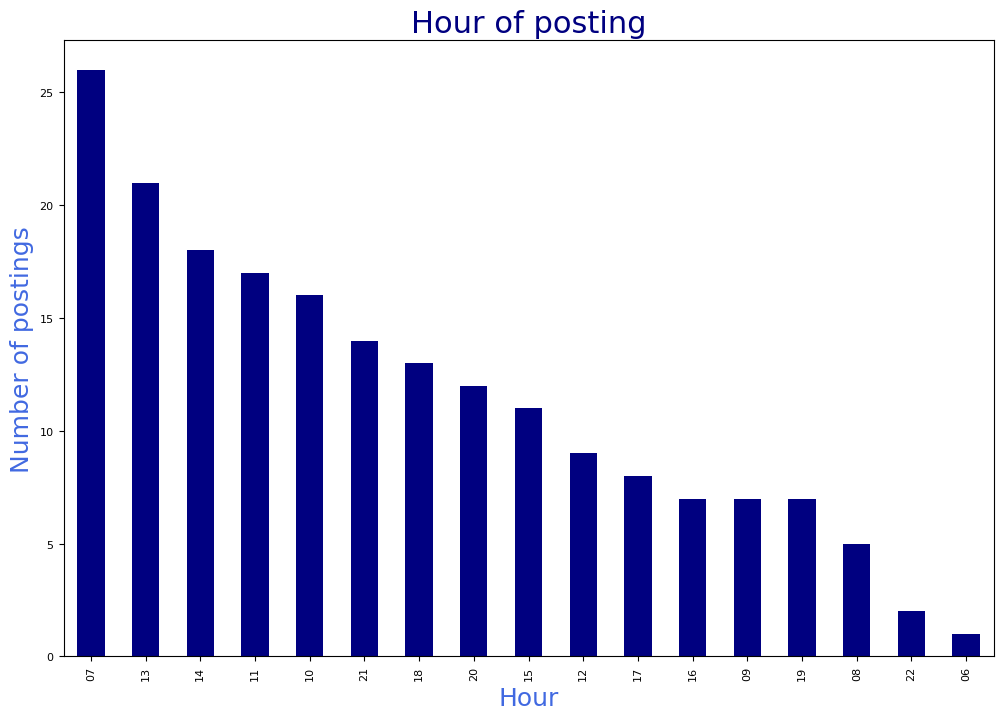

In [1976]:
# bar chart of the hours that the ads were posted
posting_hour_bar=heltimme.value_counts().plot(kind='bar', figsize=(12,8), fontsize=8, color='navy')
plt.title('Hour of posting', fontsize=22, c='navy')
plt.xlabel('Hour', fontsize=18, c='royalblue')
plt.ylabel('Number of postings', fontsize=18, c='royalblue')
plt.savefig('posting_hour_bar.png')

In [1986]:
#adding length of each ad title to new list
namelength=[]

for i in df.Namn:
    if len(i) > 0:
        namelength.append(len(i))
    else:
        namelength.append(len(i))
    


In [1707]:
ordlängd_pris = pd.DataFrame()

ordlängd_pris['Namn'] = df.Namn
ordlängd_pris['Pris'] = df.Pris
ordlängd_pris['Namnlängd'] = namelength



In [1988]:
#looking at correlation between price and title length. 
ordlängd_pris.corr()

,Pris,Namnlängd
Pris,1.00,0.17
Namnlängd,0.17,1.00


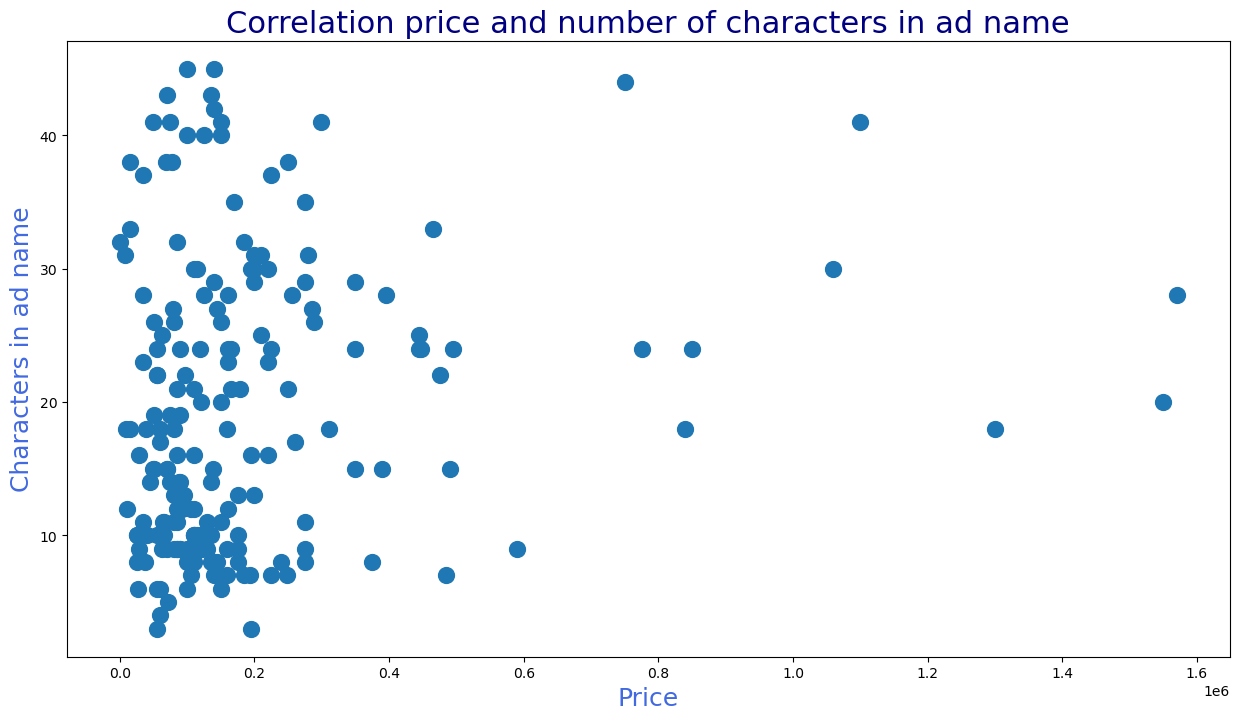

In [1728]:
#plotting said correlation
number_char_price_scatter=ordlängd_pris.plot(kind='scatter', figsize=(15,8), x='Pris', y='Namnlängd'
                   , s=130)
plt.title('Correlation price and number of characters in ad name', fontsize=22, c='navy')
plt.xlabel('Price', fontsize=18, c='royalblue')
plt.ylabel('Characters in ad name', fontsize=18, c='royalblue')
plt.savefig('number_char_price_scatter.png')


In [1734]:
#getting all the ads whose title contain maxi
maxi = df.loc[df.Namn.str.contains('Maxi')]

In [1735]:
maxi

,Namn,Pris,Ort,Fot,Datum,Tid,Namnlängd
35,Maxi 909 - lättseglad pärla,285000,Stockholm,30,24-08-2020,07:08,27
52,Maxi 909 FC,275000,Göteborg,30,22-08-2020,07:12,11
82,Lättseglad Maxi 909-87 i fint skick,275000,Skåne,30,15-08-2020,18:02,35
106,Maxi 909 OC 1988 med 18 hk Volvo Penta,250000,Göteborg,30,05-08-2020,17:57,38
109,Maxi 95,194000,Göteborg,31,05-08-2020,07:30,7
124,Höstfynd Maxi 95 -80 nr 1047,125000,Östergötland,31,31-07-2020,14:50,28
132,Maxi 95 - Special,260000,Göteborg,31,29-07-2020,18:27,17
154,Maxi 95,249000,Skaraborg,31,21-07-2020,10:24,7
170,Maxi 95,225000,Göteborg,31,15-07-2020,07:19,7


In [1760]:
#making a copy of the slice of the df
maxi = maxi.copy(deep=True)

In [1761]:
#adding new column, typ, that states the type of boat
maxi['Typ'] = 'Maxi'

In [1755]:
#getting all the ads whose title contain Rassy
rassy = df.loc[df.Namn.str.contains('Rassy')]

In [1756]:
#making a copy of the slice of the df
rassy = rassy.copy(deep=True)

In [1757]:
#adding new column, typ, that states the type of boat
rassy['Typ'] = 'Hallberg Rassy'

In [1764]:
#concatenating the two, maxi and rassy
maxi_rassy=pd.concat([maxi, rassy])

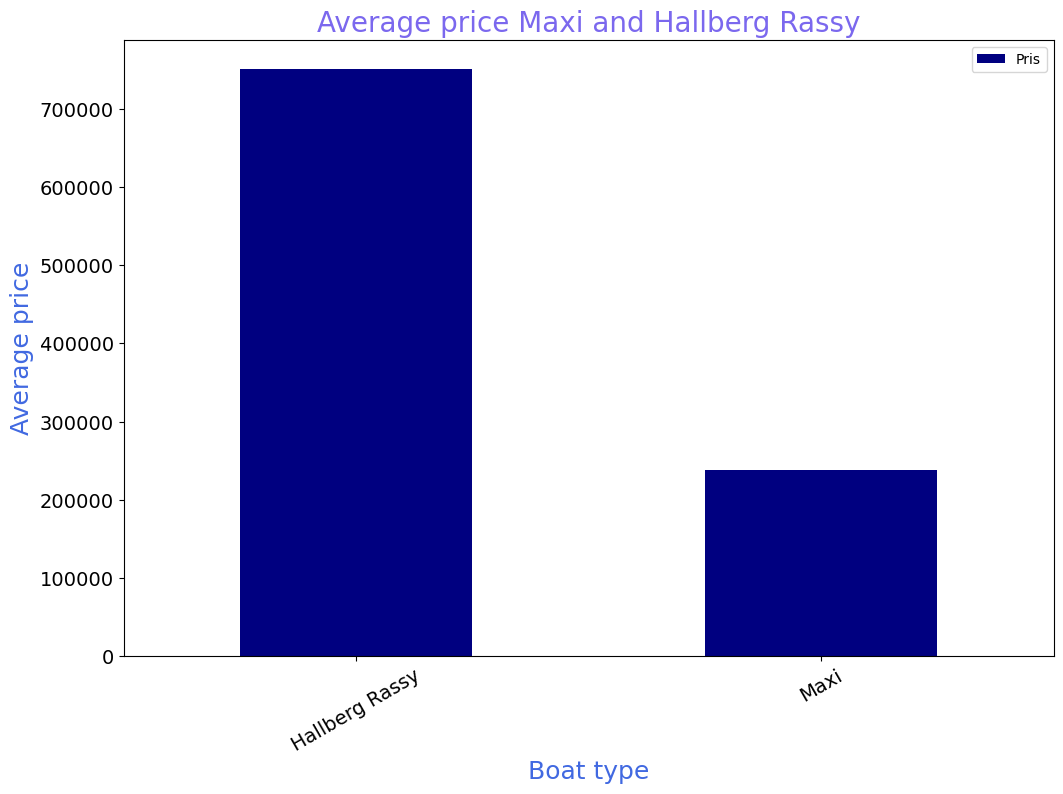

In [1852]:
#bar chart of average price of maxis and hallberg rassies
maxi_rassy_avgprice=maxi_rassy.groupby(['Typ'])[['Pris']].mean().plot(kind='bar', figsize=(12,8), color='navy', fontsize=14, rot=30)
plt.title('Average price Maxi and Hallberg Rassy', fontsize=20, c='mediumslateblue')
plt.xlabel('Boat type', fontsize=18, c='royalblue')
plt.ylabel('Average price', fontsize=18, c='royalblue')
plt.savefig('maxi_rassy_avgprice.png')

In [1853]:
#selecting only desired columns
df1 = maxi_rassy[['Pris', 'Ort','Typ']]

In [1877]:
#to pivot and be able to get a bar chart where price in certain region of maxis and rassies are displayed
df_pivot = df1.pivot_table(index=["Ort"], columns = "Typ", aggfunc = "mean",
                   values = "Pris") #, fill_value=0)
df_pivot

Typ,Hallberg Rassy,Maxi
Ort,,
Göteborg,705000.00,240800.00
Halland,850000.00,nan
Skaraborg,nan,249000.00
Skåne,601666.67,275000.00
Stockholm,775000.00,285000.00
Västmanland,1570000.00,nan
Älvsborg,350000.00,nan
Östergötland,nan,125000.00


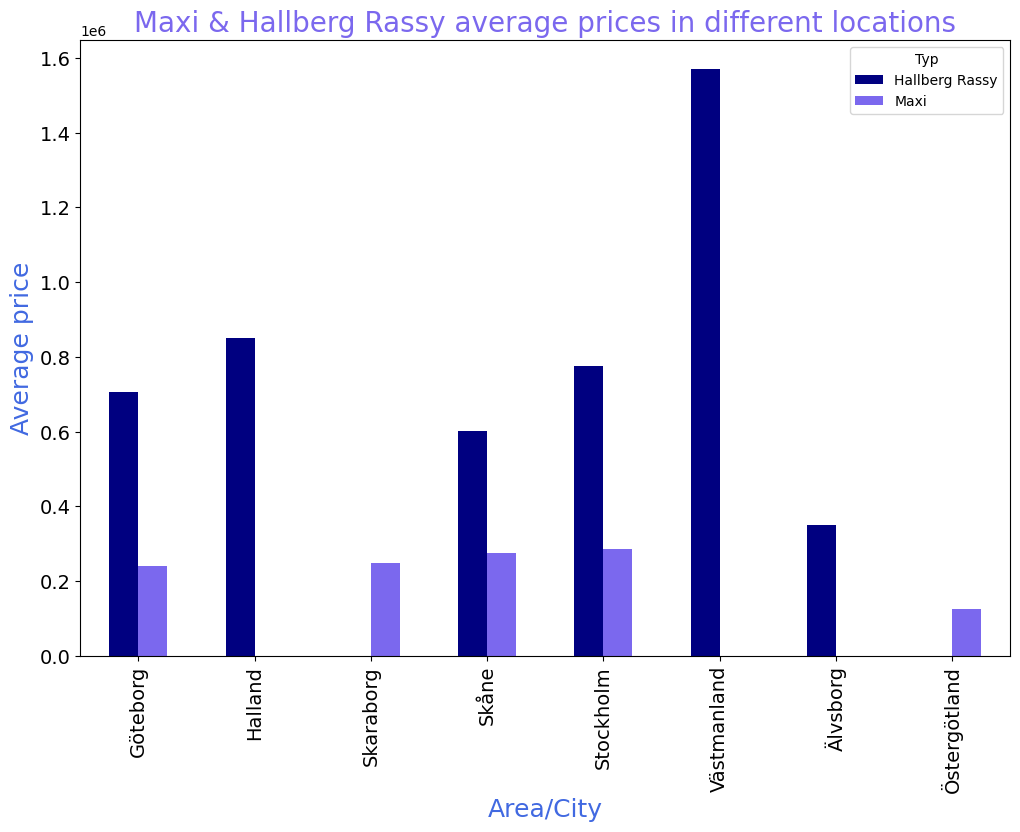

In [1860]:
#said chart
mr_avg_price_area = df_pivot.plot(kind='bar', figsize=(12,8), fontsize=14, color=['navy', 'mediumslateblue'])
plt.title('Maxi & Hallberg Rassy average prices in different locations', fontsize=20, c='mediumslateblue')
plt.xlabel('Area/City', fontsize=18, c='royalblue')
plt.ylabel('Average price', fontsize=18, c='royalblue')
plt.savefig('mr_avg_price_area.png')

In [1941]:
#grouping on location and type and counting the occurence of each boattype at each location
df2 = maxi_rassy.groupby(['Ort','Typ'])[['Pris']].count()

df2

Pris
Ort          Typ                 
Göteborg     Hallberg Rassy     2
             Maxi               5
Halland      Hallberg Rassy     1
Skaraborg    Maxi               1
Skåne        Hallberg Rassy     3
             Maxi               1
Stockholm    Hallberg Rassy     1
             Maxi               1
Västmanland  Hallberg Rassy     1
Älvsborg     Hallberg Rassy     1
Östergötland Maxi               1

In [1942]:
#getting index 
df2=df2.reset_index()

In [1944]:
#PIVOT TO BE ABLE TO DISPLAY maxi and rassy as different bars
df2=df2.pivot(index="Ort", columns = "Typ",
                   values = "Pris").fillna(0)

Text(0, 0.5, 'Number of boats available')

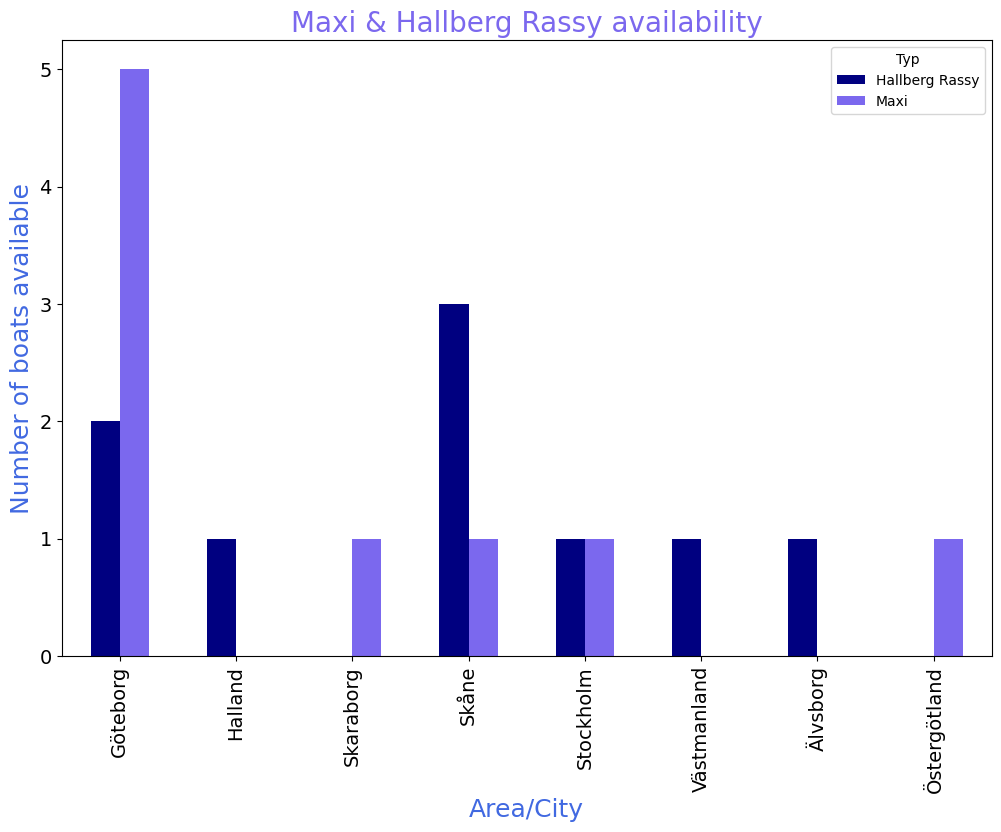

In [1979]:
#bar chart of maxis and rassys and how amny of each are for sale at each location
df2.plot(kind='bar', figsize=(12,8), fontsize=14, color=['navy', 'mediumslateblue'])
plt.title('Maxi & Hallberg Rassy availability', fontsize=20, c='mediumslateblue')
plt.xlabel('Area/City', fontsize=18, c='royalblue')
plt.ylabel('Number of boats available', fontsize=18, c='royalblue')

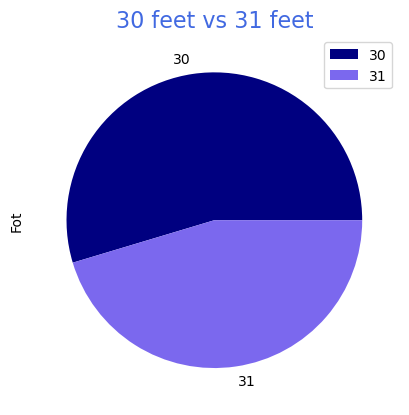

In [1949]:
# pie chart to display how many of the boats are 30 ft vs 31 ft
fot_fördelning=df.groupby(['Fot'])[['Fot']].count().plot(kind='pie', subplots=True, colors=['navy', 'mediumslateblue'])
plt.title('30 feet vs 31 feet', fontsize=16, c='royalblue')
plt.savefig('fot_fördelning.png')